In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import datetime
import matplotlib
matplotlib.rcParams['figure.figsize']=(10,8) 

In [2]:
%matplotlib inline
sns.set_style("whitegrid")
sns.set(color_codes = True)
pd.set_option("display.max_columns",50)

In [3]:
df = pd.read_excel("ANZ synthesised transaction dataset.xlsx")
df.head(3)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit


In [4]:
df.shape

(12043, 23)

<AxesSubplot:>

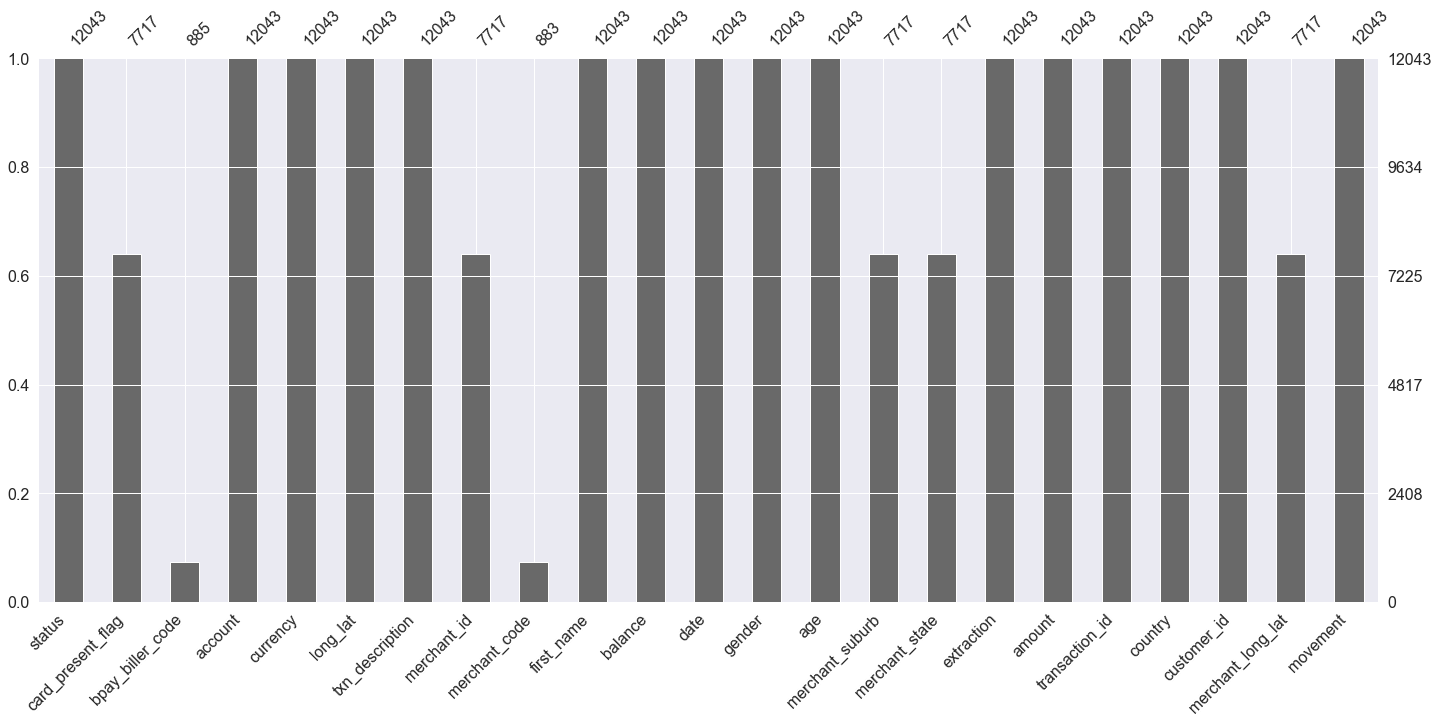

In [5]:
msno.bar(df)

In [6]:
#df[df.movement=='credit']

Here, is an observation that if the movement of the transaction is credit then the value of bpay_biller_code and merchant_code has value 0, and if the movement of the transaction is debit then the value is NaN

<AxesSubplot:>

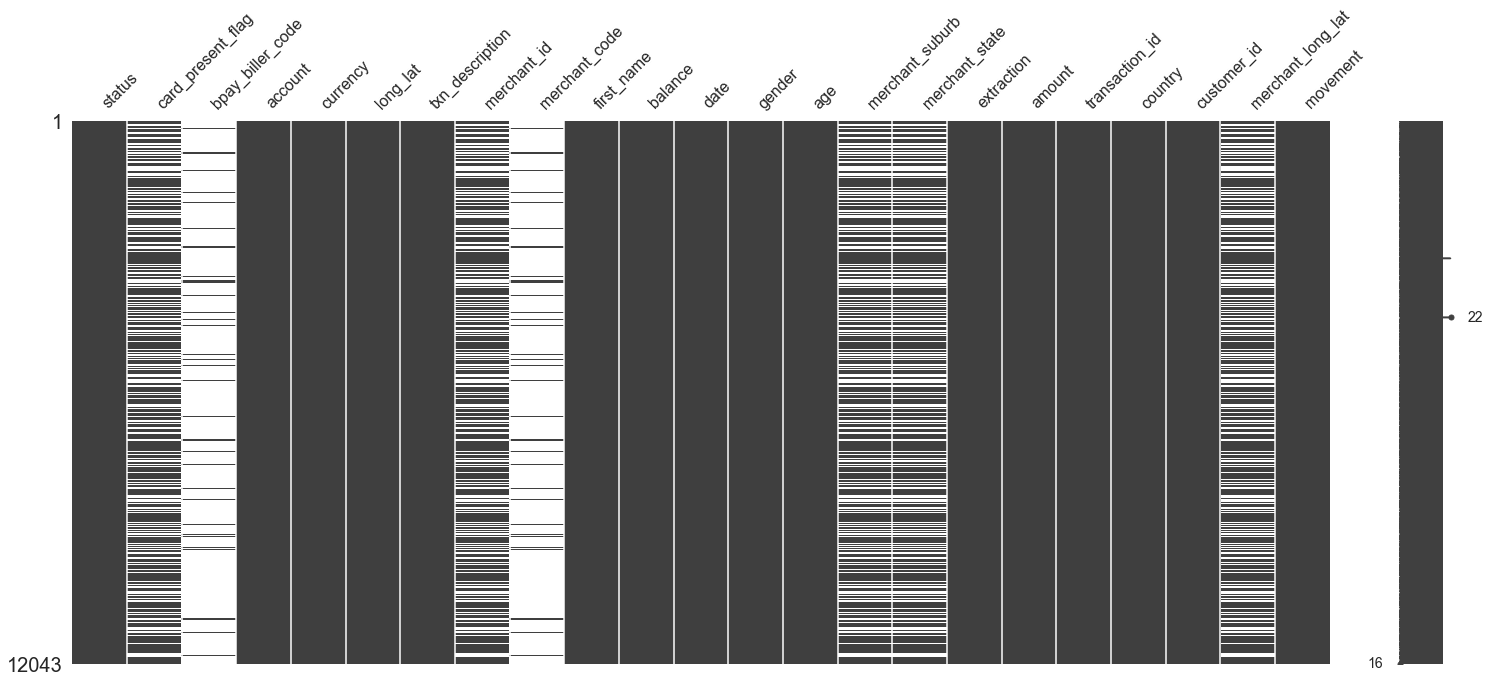

In [7]:
msno.matrix(df)

In [8]:
df.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [9]:
# Will remove 'columns bpay_biller_code' and 'merchant_code' due to missing values 
df1 = df.copy()
df1.drop(["bpay_biller_code","merchant_code"],axis=1,inplace=True)

## removing Irrelevant columns

In [10]:
df1.columns

Index(['status', 'card_present_flag', 'account', 'currency', 'long_lat',
       'txn_description', 'merchant_id', 'first_name', 'balance', 'date',
       'gender', 'age', 'merchant_suburb', 'merchant_state', 'extraction',
       'amount', 'transaction_id', 'country', 'customer_id',
       'merchant_long_lat', 'movement'],
      dtype='object')

In [11]:
df1 = df1[['status','card_present_flag','balance', 'date',
           'gender', 'age', 'merchant_suburb', 'merchant_state',
          'amount','customer_id','movement']]
df1.head()

,status,card_present_flag,balance,date,gender,age,merchant_suburb,merchant_state,amount,customer_id,movement
0,authorized,1.0,35.39,2018-08-01,F,26,Ashmore,QLD,16.25,CUS-2487424745,debit
1,authorized,0.0,21.20,2018-08-01,F,26,Sydney,NSW,14.19,CUS-2487424745,debit
2,authorized,1.0,5.71,2018-08-01,M,38,Sydney,NSW,6.42,CUS-2142601169,debit
3,authorized,1.0,2117.22,2018-08-01,F,40,Buderim,QLD,40.90,CUS-1614226872,debit
4,authorized,1.0,17.95,2018-08-01,F,26,Mermaid Beach,QLD,3.25,CUS-2487424745,debit


In [12]:
for i in df1.columns:
    if len(df1[i].unique()) < 10:
        print(i)
        print(df1[i].value_counts())
        print("___________________________")

status
authorized    7717
posted        4326
Name: status, dtype: int64
___________________________
card_present_flag
1.0    6194
0.0    1523
Name: card_present_flag, dtype: int64
___________________________
gender
M    6285
F    5758
Name: gender, dtype: int64
___________________________
merchant_state
NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64
___________________________
movement
debit     11160
credit      883
Name: movement, dtype: int64
___________________________


In [13]:
df1.date = pd.to_datetime(df1.date)

In [14]:
df1.date.max()-df1.date.min()

Timedelta('91 days 00:00:00')

In [15]:
df1['month'] = df.date.apply(lambda x: x.month)

In [16]:
months = []
for date in df1["date"]:
    if date.month == 8:
        months.append("August")
    elif date.month == 9:
        months.append("September")
    elif date.month == 10:
        months.append("October")
        
df1['month'] = months

### Total transactions made each day

In [17]:
df1.date.value_counts()

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
             ... 
2018-08-06     99
2018-08-20     97
2018-10-23     96
2018-10-08     95
2018-10-30     89
Name: date, Length: 91, dtype: int64

In [18]:
df1_day_trans = df1.groupby("date").count()
mean_trans = df1_day_trans['customer_id'].mean()

In [19]:
mean_trans

132.34065934065933

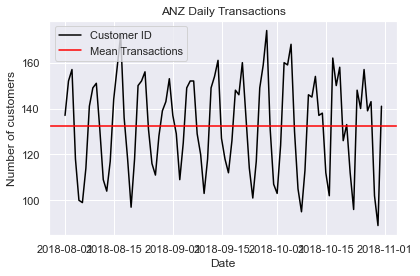

In [20]:
plt.figure()
plt.plot(df1_day_trans.index,df1_day_trans['customer_id'],c='black',label='Customer ID')
plt.axhline(mean_trans,c = 'red',label='Mean Transactions')
plt.title("ANZ Daily Transactions")
plt.xlabel("Date")
plt.ylabel("Number of customers")
plt.legend()
plt.tight_layout()
plt.show()

### Mean Tranaction amount each day

In [21]:
df1_day_amount = df1.groupby("date").mean()
mean_amount = df1_day_trans['amount'].mean()
mean_amount

132.34065934065933

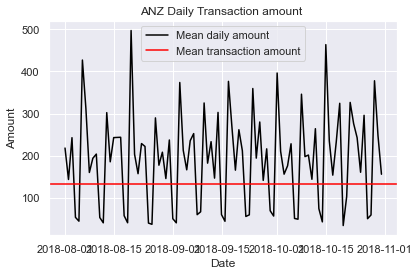

In [22]:
plt.figure()
plt.plot(df1_day_amount.index,df1_day_amount['amount'],c='black',label='Mean daily amount')
plt.axhline(mean_amount,c = 'red',label='Mean transaction amount')
plt.title("ANZ Daily Transaction amount ")
plt.xlabel("Date")
plt.ylabel("Amount")
plt.legend()
plt.tight_layout()
plt.show()

### Number of transactions per state

In [23]:
df1_trans_state = df1.groupby("merchant_state").count()
mean_state = df1_trans_state['customer_id'].mean()
mean_state

964.625

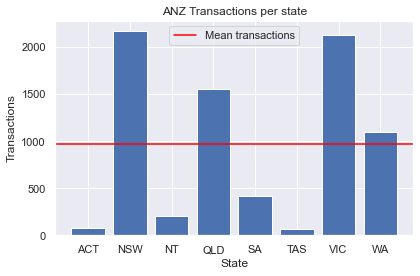

In [24]:
plt.figure()
plt.bar(df1_trans_state.index,df1_trans_state['customer_id'])
plt.axhline(mean_state,c = 'red',label='Mean transactions')
plt.title("ANZ Transactions per state")
plt.xlabel("State")
plt.ylabel("Transactions")
plt.legend()
plt.tight_layout()
plt.show()

### Monthly Transactions

In [25]:
df1_monthly_trans = df1.groupby('month').count()
mean_monthly = df1_monthly_trans['customer_id'].mean()

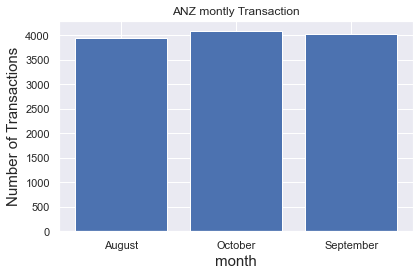

In [26]:
plt.figure()
plt.bar(df1_monthly_trans.index,df1_monthly_trans['customer_id'])
#plt.axhline(mean_monthly,c = 'red',label='Mean transaction')
plt.title("ANZ montly Transaction")
plt.xlabel("month",size=15)
plt.ylabel("Number of Transactions",size=15)
#plt.legend()
plt.tight_layout()
plt.show()

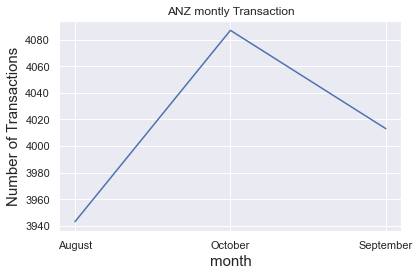

In [27]:
plt.figure()
plt.plot(df1_monthly_trans.index,df1_monthly_trans['customer_id'])
#plt.axhline(mean_monthly,c = 'red',label='Mean transaction')
plt.title("ANZ montly Transaction")
plt.xlabel("month",size=15)
plt.ylabel("Number of Transactions",size=15)
#plt.legend()
plt.tight_layout()
plt.show()

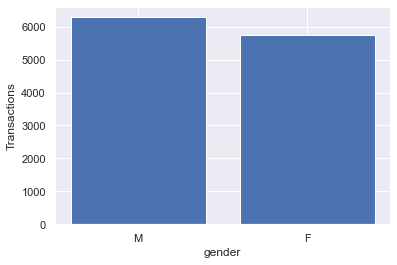

In [28]:
plt.figure()
plt.bar(df1.gender.value_counts().index,df1.gender.value_counts())
plt.xlabel("gender")
plt.ylabel("Transactions")
plt.show()

In [29]:
df1_gen_amount = df1.groupby("gender")['amount'].sum()

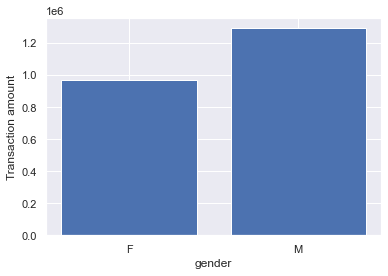

In [30]:
plt.figure()
plt.bar(df1_gen_amount.index,df1_gen_amount)
plt.xlabel("gender")
plt.ylabel("Transaction amount")
plt.show()

In [31]:
df1.head()

,status,card_present_flag,balance,date,gender,age,merchant_suburb,merchant_state,amount,customer_id,movement,month
0,authorized,1.0,35.39,2018-08-01,F,26,Ashmore,QLD,16.25,CUS-2487424745,debit,August
1,authorized,0.0,21.20,2018-08-01,F,26,Sydney,NSW,14.19,CUS-2487424745,debit,August
2,authorized,1.0,5.71,2018-08-01,M,38,Sydney,NSW,6.42,CUS-2142601169,debit,August
3,authorized,1.0,2117.22,2018-08-01,F,40,Buderim,QLD,40.90,CUS-1614226872,debit,August
4,authorized,1.0,17.95,2018-08-01,F,26,Mermaid Beach,QLD,3.25,CUS-2487424745,debit,August


In [32]:
df1.describe()

,card_present_flag,balance,age,amount
count,7717.000000,12043.000000,12043.000000,12043.000000
mean,0.802644,14704.195553,30.582330,187.933588
std,0.398029,31503.722652,10.046343,592.599934
min,0.000000,0.240000,18.000000,0.100000
25%,1.000000,3158.585000,22.000000,16.000000
50%,1.000000,6432.010000,28.000000,29.000000
75%,1.000000,12465.945000,38.000000,53.655000
max,1.000000,267128.520000,78.000000,8835.980000


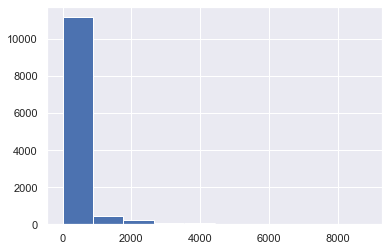

In [33]:
plt.figure()
plt.hist(df1.amount)
plt.show()

## df1['weekday'] = df1['date'].dt.day_name()

In [34]:
df1['weekday'] = df1['date'].dt.day_name()

In [35]:
df1_weekly_trans = df1.groupby('weekday').count()
mean_weekly = df1_weekly_trans['customer_id'].mean()

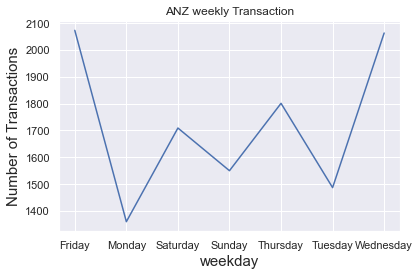

In [36]:
plt.figure()
plt.plot(df1_weekly_trans.index,df1_weekly_trans['customer_id'])
#plt.axhline(mean_monthly,c = 'red',label='Mean transaction')
plt.title("ANZ weekly Transaction")
plt.xlabel("weekday",size=15)
plt.ylabel("Number of Transactions",size=15)
#plt.legend()
plt.tight_layout()
plt.show()